In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [496]:
#Reading of data
df=pd.read_csv("day.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [497]:
df.shape

(730, 16)

In [498]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [499]:
df.describe().T # summary of all numeric  columns

count         mean          std        min          25%  \
instant     730.0   365.500000   210.877136   1.000000   183.250000   
season      730.0     2.498630     1.110184   1.000000     2.000000   
yr          730.0     0.500000     0.500343   0.000000     0.000000   
mnth        730.0     6.526027     3.450215   1.000000     4.000000   
holiday     730.0     0.028767     0.167266   0.000000     0.000000   
weekday     730.0     2.995890     2.000339   0.000000     1.000000   
workingday  730.0     0.690411     0.462641   0.000000     0.000000   
weathersit  730.0     1.394521     0.544807   1.000000     1.000000   
temp        730.0    20.319259     7.506729   2.424346    13.811885   
atemp       730.0    23.726322     8.150308   3.953480    16.889713   
hum         730.0    62.765175    14.237589   0.000000    52.000000   
windspeed   730.0    12.763620     5.195841   1.500244     9.041650   
casual      730.0   849.249315   686.479875   2.000000   316.250000   
registered  730.0  3658.757534  1559.758728  20.000000  2502.250000   
cnt         730.0  4508.006849  1936.011647  22.000000  3169.750000   

                    50%          75%          max  
instant      365.500000   547.750000   730.000000  
season         3.000000     3.000000     4.000000  
yr             0.500000     1.000000     1.000000  
mnth           7.000000    10.000000    12.000000  
holiday        0.000000     0.000000     1.000000  
weekday        3.000000     5.000000     6.000000  
workingday     1.000000     1.000000     1.000000  
weathersit     1.000000     2.000000     3.000000  
temp          20.465826    26.880615    35.328347  
atemp         24.368225    30.445775    42.044800  
hum           62.625000    72.989575    97.250000  
windspeed     12.125325    15.625589    34.000021  
casual       717.000000  1096.500000  3410.000000  
registered  3664.500000  4783.250000  6946.000000  
cnt         4548.500000  5966.000000  8714.000000

### categorical columns

In [500]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [501]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [502]:
df['yr'].value_counts()


1    365
0    365
Name: yr, dtype: int64

In [503]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [504]:
df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [505]:
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [506]:
df['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [507]:
def obj_map(x):
    return x.map({1:"jan",2:'feb',3:'mar',4:'apl',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

df[['mnth']]=df[['mnth']].apply(obj_map)

In [508]:
df['mnth'].value_counts()


aug    62
dec    62
oct    62
may    62
mar    62
jan    62
jul    62
apl    60
sep    60
jun    60
nov    60
feb    56
Name: mnth, dtype: int64

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.4+ KB


###### changing the date data type

In [510]:
df['dteday'] = df['dteday'].astype('datetime64')

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [512]:
def ass_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
df['season'] = df['season'].apply(ass_season)


In [513]:
df.head()

instant     dteday  season  yr mnth  holiday  weekday  workingday  \
0        1 2018-01-01  spring   0  jan        0        1           1   
1        2 2018-02-01  spring   0  jan        0        2           1   
2        3 2018-03-01  spring   0  jan        0        3           1   
3        4 2018-04-01  spring   0  jan        0        4           1   
4        5 2018-05-01  spring   0  jan        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [514]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [515]:
def ass_yr(x):
    if x==0:
        return '2018'
    else:
        return '2019'
    
df['yr'] = df['yr'].apply(ass_yr)

In [516]:
df.head(15)

instant     dteday  season    yr mnth  holiday  weekday  workingday  \
0         1 2018-01-01  spring  2018  jan        0        1           1   
1         2 2018-02-01  spring  2018  jan        0        2           1   
2         3 2018-03-01  spring  2018  jan        0        3           1   
3         4 2018-04-01  spring  2018  jan        0        4           1   
4         5 2018-05-01  spring  2018  jan        0        5           1   
5         6 2018-06-01  spring  2018  jan        0        6           0   
6         7 2018-07-01  spring  2018  jan        0        0           0   
7         8 2018-08-01  spring  2018  jan        0        1           1   
8         9 2018-09-01  spring  2018  jan        0        2           1   
9        10 2018-10-01  spring  2018  jan        0        3           1   
10       11 2018-11-01  spring  2018  jan        0        4           1   
11       12 2018-12-01  spring  2018  jan        0        5           1   
12       13 2018-01-13  spring  2018  jan        0        6           0   
13       14 2018-01-14  spring  2018  jan        0        0           0   
14       15 2018-01-15  spring  2018  jan        0        1           1   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0            2  14.110847  18.18125  80.5833  10.749882     331         654   
1            2  14.902598  17.68695  69.6087  16.652113     131         670   
2            1   8.050924   9.47025  43.7273  16.636703     120        1229   
3            1   8.200000  10.60610  59.0435  10.739832     108        1454   
4            1   9.305237  11.46350  43.6957  12.522300      82        1518   
5            1   8.378268  11.66045  51.8261   6.000868      88        1518   
6            2   8.057402  10.44195  49.8696  11.304642     148        1362   
7            2   6.765000   8.11270  53.5833  17.875868      68         891   
8            1   5.671653   5.80875  43.4167  24.250650      54         768   
9            1   6.184153   7.54440  48.2917  14.958889      41        1280   
10           2   6.932731   9.57320  68.6364   8.182844      43        1220   
11           1   7.081807   8.02365  59.9545  20.410009      25        1137   
12           1   6.765000   7.54415  47.0417  20.167000      38        1368   
13           1   6.595670   9.42065  53.7826   8.478716      54        1367   
14           2   9.566653  12.40560  49.8750  10.583521     222        1026   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248

In [517]:
def ass_weekday(x):
    return x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df[['weekday']]=df[['weekday']].apply(ass_weekday)

In [518]:
df.head(20)

instant     dteday  season    yr mnth  holiday weekday  workingday  \
0         1 2018-01-01  spring  2018  jan        0     Mon           1   
1         2 2018-02-01  spring  2018  jan        0     Tue           1   
2         3 2018-03-01  spring  2018  jan        0     Wed           1   
3         4 2018-04-01  spring  2018  jan        0     Thu           1   
4         5 2018-05-01  spring  2018  jan        0     Fri           1   
5         6 2018-06-01  spring  2018  jan        0     Sat           0   
6         7 2018-07-01  spring  2018  jan        0     Sun           0   
7         8 2018-08-01  spring  2018  jan        0     Mon           1   
8         9 2018-09-01  spring  2018  jan        0     Tue           1   
9        10 2018-10-01  spring  2018  jan        0     Wed           1   
10       11 2018-11-01  spring  2018  jan        0     Thu           1   
11       12 2018-12-01  spring  2018  jan        0     Fri           1   
12       13 2018-01-13  spring  2018  jan        0     Sat           0   
13       14 2018-01-14  spring  2018  jan        0     Sun           0   
14       15 2018-01-15  spring  2018  jan        0     Mon           1   
15       16 2018-01-16  spring  2018  jan        0     Tue           1   
16       17 2018-01-17  spring  2018  jan        1     Wed           0   
17       18 2018-01-18  spring  2018  jan        0     Thu           1   
18       19 2018-01-19  spring  2018  jan        0     Fri           1   
19       20 2018-01-20  spring  2018  jan        0     Sat           0   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0            2  14.110847  18.18125  80.5833  10.749882     331         654   
1            2  14.902598  17.68695  69.6087  16.652113     131         670   
2            1   8.050924   9.47025  43.7273  16.636703     120        1229   
3            1   8.200000  10.60610  59.0435  10.739832     108        1454   
4            1   9.305237  11.46350  43.6957  12.522300      82        1518   
5            1   8.378268  11.66045  51.8261   6.000868      88        1518   
6            2   8.057402  10.44195  49.8696  11.304642     148        1362   
7            2   6.765000   8.11270  53.5833  17.875868      68         891   
8            1   5.671653   5.80875  43.4167  24.250650      54         768   
9            1   6.184153   7.54440  48.2917  14.958889      41        1280   
10           2   6.932731   9.57320  68.6364   8.182844      43        1220   
11           1   7.081807   8.02365  59.9545  20.410009      25        1137   
12           1   6.765000   7.54415  47.0417  20.167000      38        1368   
13           1   6.595670   9.42065  53.7826   8.478716      54        1367   
14           2   9.566653  12.40560  49.8750  10.583521     222        1026   
15           1   9.498347  11.71085  48.3750  12.625011     251         953   
16           2   7.209153   8.83855  53.7500  12.999139     117         883   
17           2   8.883347  11.61665  86.1667   9.833925       9         674   
18           2  11.979134  14.92110  74.1739  13.957239      78        1572   
19           2  10.728347  12.75250  53.8333  13.125568      83        1844   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248  
15  1204  
16  1000  
17   683  
18  1650  
19  1927

In [519]:
def ass_weathersit(x):
    return x.map({1:'Good',2:'Normal',3:'Bad',4:'Worse'})
df[['weathersit']]=df[['weathersit']].apply(ass_weathersit)

In [520]:
df.head(20)

instant     dteday  season    yr mnth  holiday weekday  workingday  \
0         1 2018-01-01  spring  2018  jan        0     Mon           1   
1         2 2018-02-01  spring  2018  jan        0     Tue           1   
2         3 2018-03-01  spring  2018  jan        0     Wed           1   
3         4 2018-04-01  spring  2018  jan        0     Thu           1   
4         5 2018-05-01  spring  2018  jan        0     Fri           1   
5         6 2018-06-01  spring  2018  jan        0     Sat           0   
6         7 2018-07-01  spring  2018  jan        0     Sun           0   
7         8 2018-08-01  spring  2018  jan        0     Mon           1   
8         9 2018-09-01  spring  2018  jan        0     Tue           1   
9        10 2018-10-01  spring  2018  jan        0     Wed           1   
10       11 2018-11-01  spring  2018  jan        0     Thu           1   
11       12 2018-12-01  spring  2018  jan        0     Fri           1   
12       13 2018-01-13  spring  2018  jan        0     Sat           0   
13       14 2018-01-14  spring  2018  jan        0     Sun           0   
14       15 2018-01-15  spring  2018  jan        0     Mon           1   
15       16 2018-01-16  spring  2018  jan        0     Tue           1   
16       17 2018-01-17  spring  2018  jan        1     Wed           0   
17       18 2018-01-18  spring  2018  jan        0     Thu           1   
18       19 2018-01-19  spring  2018  jan        0     Fri           1   
19       20 2018-01-20  spring  2018  jan        0     Sat           0   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      Normal  14.110847  18.18125  80.5833  10.749882     331         654   
1      Normal  14.902598  17.68695  69.6087  16.652113     131         670   
2        Good   8.050924   9.47025  43.7273  16.636703     120        1229   
3        Good   8.200000  10.60610  59.0435  10.739832     108        1454   
4        Good   9.305237  11.46350  43.6957  12.522300      82        1518   
5        Good   8.378268  11.66045  51.8261   6.000868      88        1518   
6      Normal   8.057402  10.44195  49.8696  11.304642     148        1362   
7      Normal   6.765000   8.11270  53.5833  17.875868      68         891   
8        Good   5.671653   5.80875  43.4167  24.250650      54         768   
9        Good   6.184153   7.54440  48.2917  14.958889      41        1280   
10     Normal   6.932731   9.57320  68.6364   8.182844      43        1220   
11       Good   7.081807   8.02365  59.9545  20.410009      25        1137   
12       Good   6.765000   7.54415  47.0417  20.167000      38        1368   
13       Good   6.595670   9.42065  53.7826   8.478716      54        1367   
14     Normal   9.566653  12.40560  49.8750  10.583521     222        1026   
15       Good   9.498347  11.71085  48.3750  12.625011     251         953   
16     Normal   7.209153   8.83855  53.7500  12.999139     117         883   
17     Normal   8.883347  11.61665  86.1667   9.833925       9         674   
18     Normal  11.979134  14.92110  74.1739  13.957239      78        1572   
19     Normal  10.728347  12.75250  53.8333  13.125568      83        1844   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248  
15  1204  
16  1000  
17   683  
18  1650  
19  1927

In [521]:
def ass_holiday(x):
    if x == 0:
        return 'N'
    elif x==1:
        return 'Y'
df["holiday"]=df['holiday'].apply(ass_holiday)

In [522]:
df.head(20)

instant     dteday  season    yr mnth holiday weekday  workingday  \
0         1 2018-01-01  spring  2018  jan       N     Mon           1   
1         2 2018-02-01  spring  2018  jan       N     Tue           1   
2         3 2018-03-01  spring  2018  jan       N     Wed           1   
3         4 2018-04-01  spring  2018  jan       N     Thu           1   
4         5 2018-05-01  spring  2018  jan       N     Fri           1   
5         6 2018-06-01  spring  2018  jan       N     Sat           0   
6         7 2018-07-01  spring  2018  jan       N     Sun           0   
7         8 2018-08-01  spring  2018  jan       N     Mon           1   
8         9 2018-09-01  spring  2018  jan       N     Tue           1   
9        10 2018-10-01  spring  2018  jan       N     Wed           1   
10       11 2018-11-01  spring  2018  jan       N     Thu           1   
11       12 2018-12-01  spring  2018  jan       N     Fri           1   
12       13 2018-01-13  spring  2018  jan       N     Sat           0   
13       14 2018-01-14  spring  2018  jan       N     Sun           0   
14       15 2018-01-15  spring  2018  jan       N     Mon           1   
15       16 2018-01-16  spring  2018  jan       N     Tue           1   
16       17 2018-01-17  spring  2018  jan       Y     Wed           0   
17       18 2018-01-18  spring  2018  jan       N     Thu           1   
18       19 2018-01-19  spring  2018  jan       N     Fri           1   
19       20 2018-01-20  spring  2018  jan       N     Sat           0   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      Normal  14.110847  18.18125  80.5833  10.749882     331         654   
1      Normal  14.902598  17.68695  69.6087  16.652113     131         670   
2        Good   8.050924   9.47025  43.7273  16.636703     120        1229   
3        Good   8.200000  10.60610  59.0435  10.739832     108        1454   
4        Good   9.305237  11.46350  43.6957  12.522300      82        1518   
5        Good   8.378268  11.66045  51.8261   6.000868      88        1518   
6      Normal   8.057402  10.44195  49.8696  11.304642     148        1362   
7      Normal   6.765000   8.11270  53.5833  17.875868      68         891   
8        Good   5.671653   5.80875  43.4167  24.250650      54         768   
9        Good   6.184153   7.54440  48.2917  14.958889      41        1280   
10     Normal   6.932731   9.57320  68.6364   8.182844      43        1220   
11       Good   7.081807   8.02365  59.9545  20.410009      25        1137   
12       Good   6.765000   7.54415  47.0417  20.167000      38        1368   
13       Good   6.595670   9.42065  53.7826   8.478716      54        1367   
14     Normal   9.566653  12.40560  49.8750  10.583521     222        1026   
15       Good   9.498347  11.71085  48.3750  12.625011     251         953   
16     Normal   7.209153   8.83855  53.7500  12.999139     117         883   
17     Normal   8.883347  11.61665  86.1667   9.833925       9         674   
18     Normal  11.979134  14.92110  74.1739  13.957239      78        1572   
19     Normal  10.728347  12.75250  53.8333  13.125568      83        1844   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248  
15  1204  
16  1000  
17   683  
18  1650  
19  1927

In [523]:
def ass_workingday(x):
    if x == 1:
        return 'N'
    elif x==0:
        return 'Y'
df["workingday"]=df['workingday'].apply(ass_workingday)

In [524]:
df.head(20)

instant     dteday  season    yr mnth holiday weekday workingday  \
0         1 2018-01-01  spring  2018  jan       N     Mon          N   
1         2 2018-02-01  spring  2018  jan       N     Tue          N   
2         3 2018-03-01  spring  2018  jan       N     Wed          N   
3         4 2018-04-01  spring  2018  jan       N     Thu          N   
4         5 2018-05-01  spring  2018  jan       N     Fri          N   
5         6 2018-06-01  spring  2018  jan       N     Sat          Y   
6         7 2018-07-01  spring  2018  jan       N     Sun          Y   
7         8 2018-08-01  spring  2018  jan       N     Mon          N   
8         9 2018-09-01  spring  2018  jan       N     Tue          N   
9        10 2018-10-01  spring  2018  jan       N     Wed          N   
10       11 2018-11-01  spring  2018  jan       N     Thu          N   
11       12 2018-12-01  spring  2018  jan       N     Fri          N   
12       13 2018-01-13  spring  2018  jan       N     Sat          Y   
13       14 2018-01-14  spring  2018  jan       N     Sun          Y   
14       15 2018-01-15  spring  2018  jan       N     Mon          N   
15       16 2018-01-16  spring  2018  jan       N     Tue          N   
16       17 2018-01-17  spring  2018  jan       Y     Wed          Y   
17       18 2018-01-18  spring  2018  jan       N     Thu          N   
18       19 2018-01-19  spring  2018  jan       N     Fri          N   
19       20 2018-01-20  spring  2018  jan       N     Sat          Y   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      Normal  14.110847  18.18125  80.5833  10.749882     331         654   
1      Normal  14.902598  17.68695  69.6087  16.652113     131         670   
2        Good   8.050924   9.47025  43.7273  16.636703     120        1229   
3        Good   8.200000  10.60610  59.0435  10.739832     108        1454   
4        Good   9.305237  11.46350  43.6957  12.522300      82        1518   
5        Good   8.378268  11.66045  51.8261   6.000868      88        1518   
6      Normal   8.057402  10.44195  49.8696  11.304642     148        1362   
7      Normal   6.765000   8.11270  53.5833  17.875868      68         891   
8        Good   5.671653   5.80875  43.4167  24.250650      54         768   
9        Good   6.184153   7.54440  48.2917  14.958889      41        1280   
10     Normal   6.932731   9.57320  68.6364   8.182844      43        1220   
11       Good   7.081807   8.02365  59.9545  20.410009      25        1137   
12       Good   6.765000   7.54415  47.0417  20.167000      38        1368   
13       Good   6.595670   9.42065  53.7826   8.478716      54        1367   
14     Normal   9.566653  12.40560  49.8750  10.583521     222        1026   
15       Good   9.498347  11.71085  48.3750  12.625011     251         953   
16     Normal   7.209153   8.83855  53.7500  12.999139     117         883   
17     Normal   8.883347  11.61665  86.1667   9.833925       9         674   
18     Normal  11.979134  14.92110  74.1739  13.957239      78        1572   
19     Normal  10.728347  12.75250  53.8333  13.125568      83        1844   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248  
15  1204  
16  1000  
17   683  
18  1650  
19  1927

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Datavisualisation on Univariate analysis


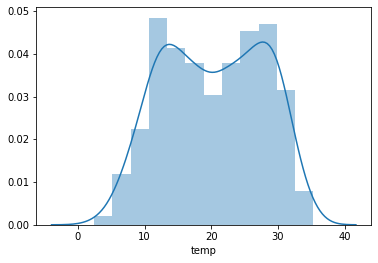

In [526]:
#Analysis on temperature
sns.distplot(df['temp'])
plt.show();

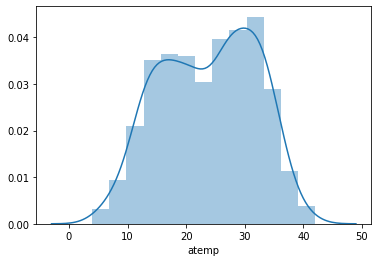

In [527]:
# Analysis on 'atemp'
sns.distplot(df['atemp'])
plt.show();

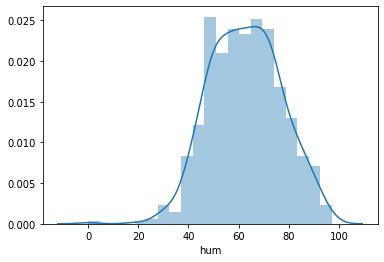

In [528]:
# Analysis on 'HUM'
sns.distplot(df['hum'])
plt.show();

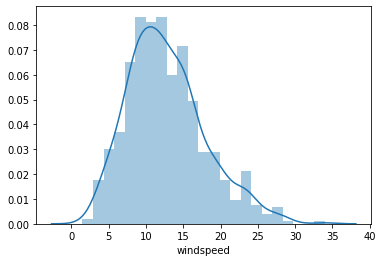

In [529]:
#Analysis on 'windspeed'
sns.distplot(df['windspeed'])
plt.show();

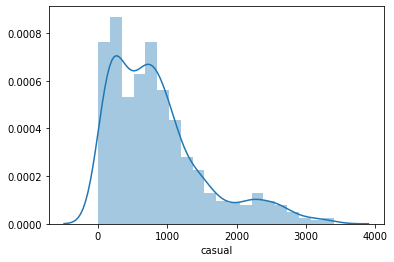

In [530]:
#Analysis on 'casual'
sns.distplot(df['casual'])
plt.show();

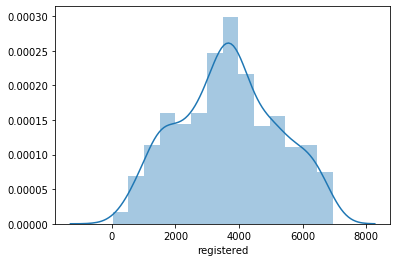

In [531]:
#Analysis on registered
sns.distplot(df['registered'])
plt.show();

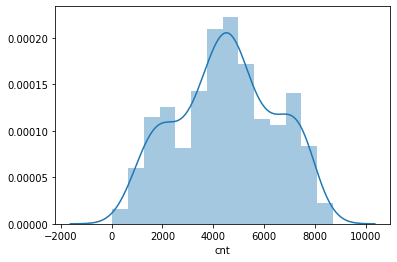

In [532]:
#Analysis on 'cnt'
sns.distplot(df['cnt'])
plt.show();

    INSIGHTS:
    1. More demand on bike when temp
    2. Higher demand on bike when atemp between 
    3. Higher demand when humidity is 50 -70%
    4. Higher demand when windspeed is 10 to 15
    5. Higher amount of registered users compared to casual users
    6. Avg count lies between 4000 and 5000

### Categorical data visualisation

In [533]:
df_categorical = df.select_dtypes(exclude=['float64','datetime64','int64'])

In [534]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [535]:
len(df_categorical.columns)

7

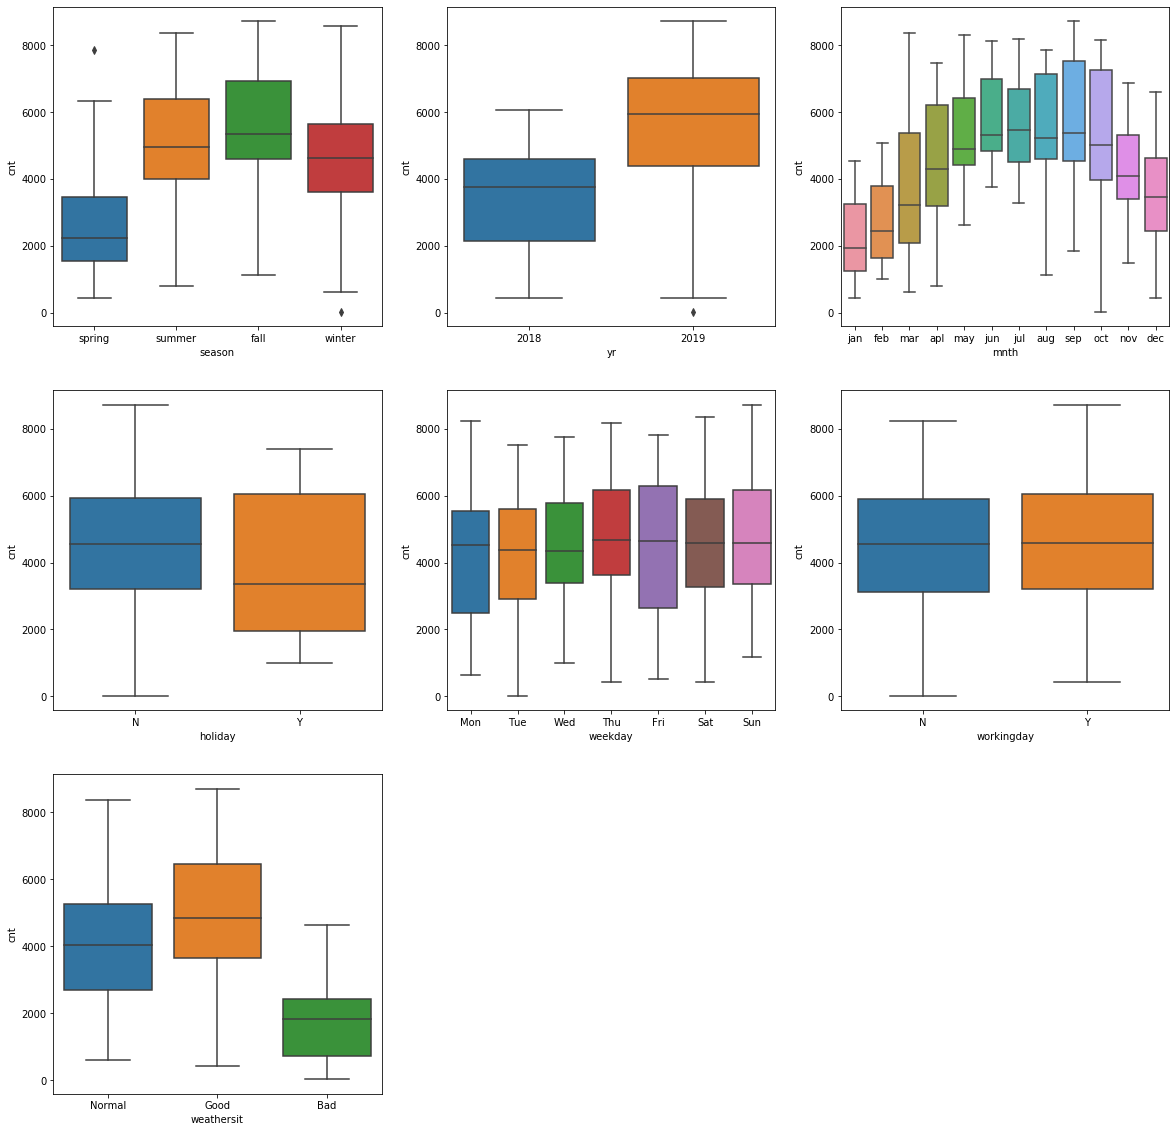

In [536]:
# Visualize all the Categorical Columns

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit',y='cnt',data=df)
plt.show()

##### INSIGHTS

    1.More users during the fall season 
    2.2019 has higher nnumber of users
    3.jun to sep is the time with higher number of users
    4.NO speciality on the weekdays and working days
    5.as expected very high users on GOOD and normal day,very low and significantly 0 user on bad and worse day respectively 
    

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [538]:
#oconverting int columns to float
IV=['casual','registered','cnt']

for var in IV:
    df[var]=df[var].astype('float')

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

In [540]:
#select the numeric variables
df_numerics=df.select_dtypes(include=['float64'])
df_numerics.head()

temp     atemp      hum  windspeed  casual  registered     cnt
0  14.110847  18.18125  80.5833  10.749882   331.0       654.0   985.0
1  14.902598  17.68695  69.6087  16.652113   131.0       670.0   801.0
2   8.050924   9.47025  43.7273  16.636703   120.0      1229.0  1349.0
3   8.200000  10.60610  59.0435  10.739832   108.0      1454.0  1562.0
4   9.305237  11.46350  43.6957  12.522300    82.0      1518.0  1600.0

In [541]:
df_numerics.shape

(730, 7)

In [542]:
df_numerics.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

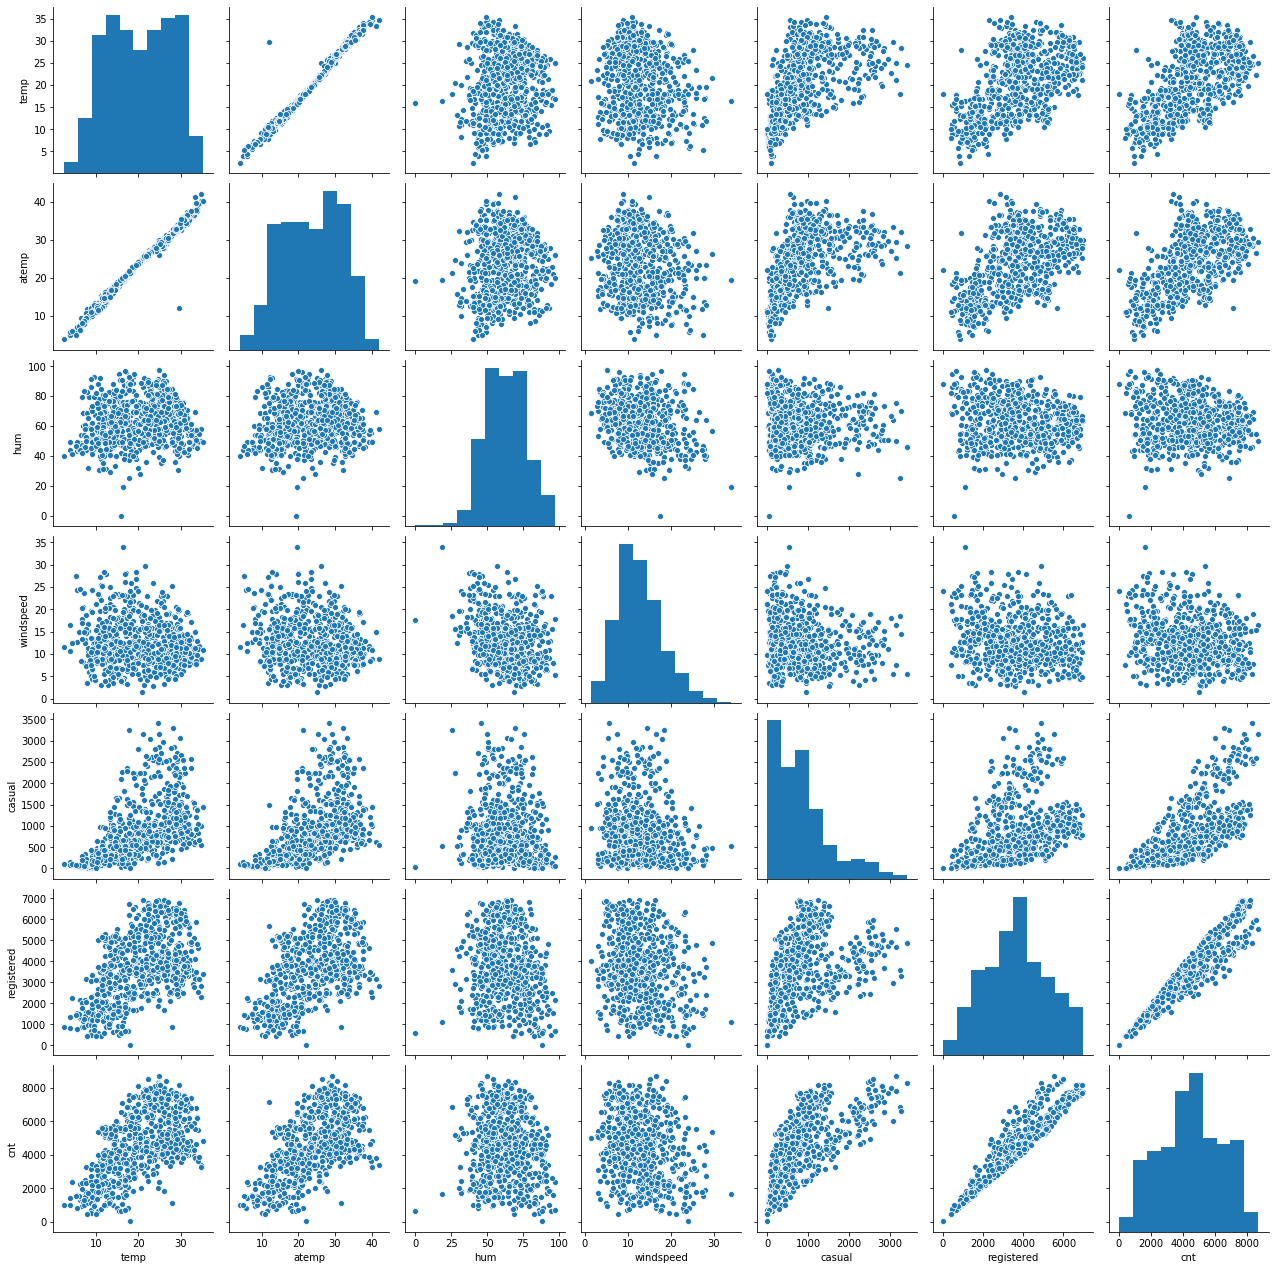

In [543]:
#visualisation of num columns
sns.pairplot(df_numerics[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.show()

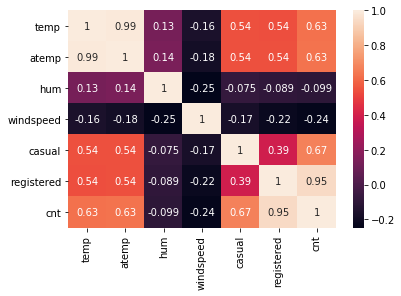

In [544]:
#correlation matric
sns.heatmap(df_numerics.corr(),annot=True)
plt.show()

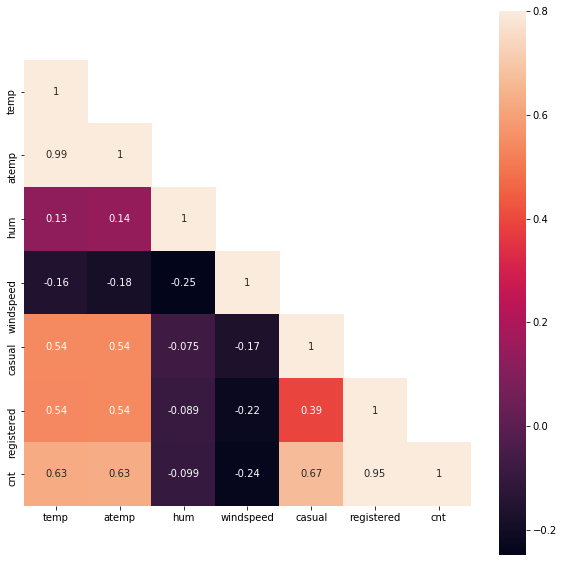

In [545]:
#heAT map
mask = np.array(df_numerics.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(df_numerics.corr(),mask=mask,vmax=0.8,square=True,annot=True);

    INSIGHT:
    1.Here we could see that the casual and registered has a higher correlation with count
    2.similarly we could see that "atemp" and "temp" has a higher correlation

## Data preparation

In [546]:
df.head()

instant     dteday  season    yr mnth holiday weekday workingday  \
0        1 2018-01-01  spring  2018  jan       N     Mon          N   
1        2 2018-02-01  spring  2018  jan       N     Tue          N   
2        3 2018-03-01  spring  2018  jan       N     Wed          N   
3        4 2018-04-01  spring  2018  jan       N     Thu          N   
4        5 2018-05-01  spring  2018  jan       N     Fri          N   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0     Normal  14.110847  18.18125  80.5833  10.749882   331.0       654.0   
1     Normal  14.902598  17.68695  69.6087  16.652113   131.0       670.0   
2       Good   8.050924   9.47025  43.7273  16.636703   120.0      1229.0   
3       Good   8.200000  10.60610  59.0435  10.739832   108.0      1454.0   
4       Good   9.305237  11.46350  43.6957  12.522300    82.0      1518.0   

      cnt  
0   985.0  
1   801.0  
2  1349.0  
3  1562.0  
4  1600.0

In [547]:
#droping the columns 
df.drop('casual',axis=1,inplace=True)
df.drop('registered',axis=1,inplace=True)
df.drop('atemp',axis=1,inplace=True)
df.drop('dteday',axis=1,inplace=True)
df.drop('instant',axis=1,inplace=True)

In [548]:
df.head()

season    yr mnth holiday weekday workingday weathersit       temp  \
0  spring  2018  jan       N     Mon          N     Normal  14.110847   
1  spring  2018  jan       N     Tue          N     Normal  14.902598   
2  spring  2018  jan       N     Wed          N       Good   8.050924   
3  spring  2018  jan       N     Thu          N       Good   8.200000   
4  spring  2018  jan       N     Fri          N       Good   9.305237   

       hum  windspeed     cnt  
0  80.5833  10.749882   985.0  
1  69.6087  16.652113   801.0  
2  43.7273  16.636703  1349.0  
3  59.0435  10.739832  1562.0  
4  43.6957  12.522300  1600.0

In [549]:

df.drop('workingday',axis=1,inplace=True)

In [550]:
df.head()

season    yr mnth holiday weekday weathersit       temp      hum  \
0  spring  2018  jan       N     Mon     Normal  14.110847  80.5833   
1  spring  2018  jan       N     Tue     Normal  14.902598  69.6087   
2  spring  2018  jan       N     Wed       Good   8.050924  43.7273   
3  spring  2018  jan       N     Thu       Good   8.200000  59.0435   
4  spring  2018  jan       N     Fri       Good   9.305237  43.6957   

   windspeed     cnt  
0  10.749882   985.0  
1  16.652113   801.0  
2  16.636703  1349.0  
3  10.739832  1562.0  
4  12.522300  1600.0

In [551]:
# Lets procedd to do OHE of the categorical cols

df_categorical = df.select_dtypes(include=['object'])

df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit'], dtype='object')

In [552]:
df_dummies=pd.get_dummies(df_categorical,drop_first=True)
df_dummies.head()

season_spring  season_summer  season_winter  yr_2019  mnth_aug  mnth_dec  \
0              1              0              0        0         0         0   
1              1              0              0        0         0         0   
2              1              0              0        0         0         0   
3              1              0              0        0         0         0   
4              1              0              0        0         0         0   

   mnth_feb  mnth_jan  mnth_jul  mnth_jun  ...  mnth_sep  holiday_Y  \
0         0         1         0         0  ...         0          0   
1         0         1         0         0  ...         0          0   
2         0         1         0         0  ...         0          0   
3         0         1         0         0  ...         0          0   
4         0         1         0         0  ...         0          0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  weathersit_Good  weathersit_Normal  
0            0                0                  1  
1            0                0                  1  
2            1                1                  0  
3            0                1                  0  
4            0                1                  0  

[5 rows x 24 columns]

In [553]:
df=df.drop(df_categorical,axis=1)
df.columns

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [554]:
df=pd.concat([df,df_dummies],axis=1)
df.head()

temp      hum  windspeed     cnt  season_spring  season_summer  \
0  14.110847  80.5833  10.749882   985.0              1              0   
1  14.902598  69.6087  16.652113   801.0              1              0   
2   8.050924  43.7273  16.636703  1349.0              1              0   
3   8.200000  59.0435  10.739832  1562.0              1              0   
4   9.305237  43.6957  12.522300  1600.0              1              0   

   season_winter  yr_2019  mnth_aug  mnth_dec  ...  mnth_sep  holiday_Y  \
0              0        0         0         0  ...         0          0   
1              0        0         0         0  ...         0          0   
2              0        0         0         0  ...         0          0   
3              0        0         0         0  ...         0          0   
4              0        0         0         0  ...         0          0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  weathersit_Good  weathersit_Normal  
0            0                0                  1  
1            0                0                  1  
2            1                1                  0  
3            0                1                  0  
4            0                1                  0  

[5 rows x 28 columns]

### Splitting dataset into Test and Train

In [555]:
X=df.drop('cnt',axis=1)
y=df['cnt']

In [556]:
X.shape

(730, 27)

In [557]:
y.shape

(730,)

In [558]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [559]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 27)
(146, 27)
(584,)
(146,)


In [560]:
X_train.head()

temp      hum  windspeed  season_spring  season_summer  \
176  27.880000  51.3333   6.333731              0              0   
172  30.066653  70.7500  11.541554              0              0   
142  25.898347  81.0000  15.667414              0              1   
237  28.700000  76.1250   5.625488              0              0   
531  25.898347  50.4167  11.166689              0              1   

     season_winter  yr_2019  mnth_aug  mnth_dec  mnth_feb  ...  mnth_sep  \
176              0        0         0         0         0  ...         0   
172              0        0         0         0         0  ...         0   
142              0        0         0         0         0  ...         0   
237              0        0         1         0         0  ...         0   
531              0        1         0         0         0  ...         0   

     holiday_Y  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
176          0            0            0            0            0   
172          0            0            0            0            0   
142          0            0            0            0            0   
237          0            0            0            1            0   
531          0            0            0            1            0   

     weekday_Tue  weekday_Wed  weathersit_Good  weathersit_Normal  
176            1            0                1                  0  
172            0            0                1                  0  
142            0            1                0                  1  
237            0            0                1                  0  
531            0            0                1                  0  

[5 rows x 27 columns]

In [561]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'holiday_Y', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Good', 'weathersit_Normal'],
      dtype='object')

In [562]:
#scaling of numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [563]:
var=['temp', 'hum', 'windspeed']
X_train[var]=scaler.fit_transform(X_train[var])

In [564]:
X_train.head()

temp       hum  windspeed  season_spring  season_summer  \
176  0.773634  0.527849   0.148724              0              0   
172  0.840090  0.727506   0.308966              0              0   
142  0.713409  0.832905   0.435916              0              1   
237  0.798555  0.782776   0.126931              0              0   
531  0.713409  0.518424   0.297431              0              1   

     season_winter  yr_2019  mnth_aug  mnth_dec  mnth_feb  ...  mnth_sep  \
176              0        0         0         0         0  ...         0   
172              0        0         0         0         0  ...         0   
142              0        0         0         0         0  ...         0   
237              0        0         1         0         0  ...         0   
531              0        1         0         0         0  ...         0   

     holiday_Y  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
176          0            0            0            0            0   
172          0            0            0            0            0   
142          0            0            0            0            0   
237          0            0            0            1            0   
531          0            0            0            1            0   

     weekday_Tue  weekday_Wed  weathersit_Good  weathersit_Normal  
176            1            0                1                  0  
172            0            0                1                  0  
142            0            1                0                  1  
237            0            0                1                  0  
531            0            0                1                  0  

[5 rows x 27 columns]

### Training and making predictions

In [565]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [566]:
coeff_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficents'])
coeff_df

Coefficents
temp               3792.692494
hum               -1525.212352
windspeed         -1537.049352
season_spring      -919.077988
season_summer       -64.985901
season_winter       661.270523
yr_2019            2025.689579
mnth_aug           -266.457237
mnth_dec           -518.981890
mnth_feb           -326.767898
mnth_jan           -445.351543
mnth_jul           -756.085754
mnth_jun            -75.932101
mnth_mar            114.700782
mnth_may            187.135471
mnth_nov           -625.359180
mnth_oct            -57.254611
mnth_sep            332.698564
holiday_Y          -588.478900
weekday_Mon        -109.451240
weekday_Sat          65.546590
weekday_Sun          89.179959
weekday_Thu          87.681956
weekday_Tue        -231.706648
weekday_Wed        -112.823725
weathersit_Good    1966.833975
weathersit_Normal  1535.605135

In [567]:
regressor.intercept_

1511.9108626749335

In [568]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'holiday_Y', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Good', 'weathersit_Normal'],
      dtype='object')

In [569]:
X_test.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'holiday_Y', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Good', 'weathersit_Normal'],
      dtype='object')

In [570]:
X_test[var]=scaler.transform(X_test[var])

#### predictions

In [571]:
y_pred=regressor.predict(X_test)

In [572]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

Actual    Predicted
566  4459.0  3444.884996
374  3598.0  3869.791953
181  5362.0  5071.207395
529  7363.0  6521.663957
233  4758.0  4545.648770
..      ...          ...
6    1510.0  1175.746345
705  5008.0  4976.460627
261  4539.0  4091.216360
579  7175.0  6591.598672
381  2935.0  3121.564171

[146 rows x 2 columns]

In [573]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 563.043906916397
Mean Squared Error: 556167.333997969
Root Mean Squared Error: 745.7662730359755


In [574]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.8411658135243012

In [575]:
#adjusted r-squared for train set
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.846779948178901 0.8393394060940634


In [576]:
#adjusted r-squared for test set
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8411658135243013 0.8048223979747771


The model chosen provides a R-squared of .84
and the adjusted R-squared of .81

### Recursive feature elemination(RFE)

In [577]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets
dataset = datasets.load_iris()
svm = LinearSVC() 
# Create RFE Model for svm Classifier
rfe = RFE(svm,3)
rfe.fit(dataset.data, dataset.target)
# Printing the summary for selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


In [578]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [579]:
#RFE of 20 features
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 20) 
rfe = rfe.fit(X_train,y_train)

In [580]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 6),
 ('mnth_mar', False, 2),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 8),
 ('mnth_sep', True, 1),
 ('holiday_Y', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 3),
 ('weekday_Thu', False, 4),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Normal', True, 1)]

In [581]:
X_train.columns[rfe.support_]

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_may',
       'mnth_nov', 'mnth_sep', 'holiday_Y', 'weekday_Mon', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Good', 'weathersit_Normal'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [582]:
from statsmodels.api import add_constant
import statsmodels.api as sm
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

temp       hum  windspeed  season_spring  season_winter  yr_2019  \
176  0.773634  0.527849   0.148724              0              0        0   
172  0.840090  0.727506   0.308966              0              0        0   
142  0.713409  0.832905   0.435916              0              0        0   
237  0.798555  0.782776   0.126931              0              0        0   
531  0.713409  0.518424   0.297431              0              0        1   

     mnth_aug  mnth_dec  mnth_feb  mnth_jan  mnth_jul  mnth_may  mnth_nov  \
176         0         0         0         0         0         0         0   
172         0         0         0         0         0         0         0   
142         0         0         0         0         0         1         0   
237         1         0         0         0         0         0         0   
531         0         0         0         0         0         0         0   

     mnth_sep  holiday_Y  weekday_Mon  weekday_Tue  weekday_Wed  \
176         0          0            0            1            0   
172         0          0            0            0            0   
142         0          0            0            0            1   
237         0          0            0            0            0   
531         0          0            0            0            0   

     weathersit_Good  weathersit_Normal  
176                1                  0  
172                1                  0  
142                0                  1  
237                1                  0  
531                1                  0

In [583]:
def sm_linearmodel(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [584]:
# Function to calculate VIF
# calculate VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [585]:
# Create 1st stats model and look for summary and VIF
lm_1 = sm_linearmodel(X_train_rfe)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     155.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.08e-214
Time:                        22:04:19   Log-Likelihood:                -4705.6
No. Observations:                 584   AIC:                             9453.
Df Residuals:                     563   BIC:                             9545.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1560.4445    375.17

    
    -HERE THE FEATURES HAVE A P-VALUE MORE THAN .05
     
     BUT we have very high range of VARIANCE INFLATION FACTOR(VIF)


    INSIGHTS:

       1. R2 : 0.846 and Ajusted-R2 : 0.841. the variables are having pvalue>0.05. Now we will DROP 1 BY 1.
       2. HERE mnth_aug is having a higer p-value,
          
          so lets drop that
     

In [586]:
# drop varible having high VIF
X_train_new = X_train_rfe.drop(['mnth_aug'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     163.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.23e-214
Time:                        22:04:26   Log-Likelihood:                -4706.4
No. Observations:                 584   AIC:                             9453.
Df Residuals:                     564   BIC:                             9540.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1604.1830    373.43

    Insights:

        1.After dropping the variable 'mnth_aug' there is no significant change in R-squared or adj. R2-squared. So decission to drop the variable is correct.
        2.here, the pvalue is higher for 'weekday_mon'
         so ,lets drop that

In [587]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['weekday_Mon'],axis = 1)

# Create stats model and look for summary
lm_3 = sm_linearmodel(X_train_new)
print(lm_3.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.60e-215
Time:                        22:04:40   Log-Likelihood:                -4708.2
No. Observations:                 584   AIC:                             9454.
Df Residuals:                     565   BIC:                             9537.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1593.8623    374.26

    insights:
    
       1. R2 : 0.845 and Ajusted-R2 : 0.840. the variables are having pvalue>0.05. Now we will DROP 1 BY 1.
       2. HERE weekday_wed is having a higer p-value,
          
          so lets drop that
    

In [588]:
# drop varible having p-value
X_train_new = X_train_new.drop(['weekday_Wed'],axis = 1)

# Create stats model and look for summary
lm_4 = sm_linearmodel(X_train_new)
print(lm_4.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.30e-215
Time:                        22:05:07   Log-Likelihood:                -4709.4
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     566   BIC:                             9533.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1596.1047    374.69

    INSIGHTS:
    1. The dropping of the weekday_Wed had no significant change  in the R-squared and the adjusted R-squared
    2.here the mnth_may has a higher p value and lets drop the feature

In [589]:
# drop varible having high pvalue
X_train_new = X_train_new.drop(['mnth_may'],axis = 1)

# Create stats model and look for summary
lm_5 = sm_linearmodel(X_train_new)
print(lm_5.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.07e-216
Time:                        22:05:11   Log-Likelihood:                -4711.4
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     567   BIC:                             9531.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1560.4643    375.16

    INSIGHTS:
    1. The dropping of this feature was correct as this feature did no significant change in the R-squared and the adjusted Rsquared
    2.all the p values are less than .05
    3.lets remove te feature with a higher VIF,temp is having highest VIF (22.17), but during EDA we could see temp has a high correlation with cnt and also its a important varible based on business understanding. So we will keep that varible and look for highest variable which is >5.

In [590]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['hum'],axis = 1)

# Create stats model and look for summary
lm_6 = sm_linearmodel(X_train_new)
print(lm_6.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     194.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.88e-212
Time:                        22:05:30   Log-Likelihood:                -4723.2
No. Observations:                 584   AIC:                             9478.
Df Residuals:                     568   BIC:                             9548.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.0167    276.65

    INSIGHTS:
    1.we could see that the windspeed column has no significant changes in the r-squared and the adjusted-rsquared;
    2.the VIF of weathersit_good is greater than 5,
     so lets drop it

In [591]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['weathersit_Good'],axis = 1)

# Create stats model and look for summary
lm_7 = sm_linearmodel(X_train_new)
print(lm_7.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     151.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.58e-181
Time:                        22:05:40   Log-Likelihood:                -4798.6
No. Observations:                 584   AIC:                             9627.
Df Residuals:                     569   BIC:                             9693.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2616.0492    240.39

    INSIGHTS:
    1.The dropping of this column was correct aas this did no significant change in the r-squared and the adjusted r-squared
    
    2.The p values of mnth_sep is greater than .05, so lets drop it

In [592]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_sep'],axis = 1)

# Create stats model and look for summary
lm_8 = sm_linearmodel(X_train_new)
print(lm_8.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     162.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.34e-182
Time:                        22:05:51   Log-Likelihood:                -4800.0
No. Observations:                 584   AIC:                             9628.
Df Residuals:                     570   BIC:                             9689.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2605.0993    240.62

    INSIGHTS:
    
    1.The dropping of this column was correct aas this did no significant change in the r-squared and the adjusted r-squared
    
    2.The p values of weekday_Tue is greater than .05, so lets drop it

In [593]:
# drop varible having high pvalue
X_train_new = X_train_new.drop(['weekday_Tue'],axis = 1)

# Create stats model and look for summary
lm_9 = sm_linearmodel(X_train_new)
print(lm_9.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.66e-182
Time:                        22:05:57   Log-Likelihood:                -4801.7
No. Observations:                 584   AIC:                             9629.
Df Residuals:                     571   BIC:                             9686.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2589.0894    240.95

        INSIGHTS:
    
    1.The dropping of this column was correct aas this did no significant change in the r-squared and the adjusted r-squared
    
    2.The p values of mnth_feb is greater than .05, so lets drop it

In [594]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_feb'],axis = 1)

# Create stats model and look for summary
lm_10 = sm_linearmodel(X_train_new)
print(lm_10.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     190.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.66e-183
Time:                        22:06:02   Log-Likelihood:                -4803.6
No. Observations:                 584   AIC:                             9631.
Df Residuals:                     572   BIC:                             9684.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2509.8094    238.05

            INSIGHTS:
    
    1.The dropping of this column was correct aas this did no significant change in the r-squared and the adjusted r-squared
    
    

### Final Model and its variables:

In [595]:
# assign final model to lm_final
lm_final = lm_10

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['temp', 'windspeed', 'season_spring', 'season_winter', 'yr_2019', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'holiday_Y', 'weathersit_Normal']

Coefficent for the variables are:
const                2509.809
temp                 3637.782
windspeed           -1649.514
season_spring        -990.057
season_winter         448.658
yr_2019              2149.518
mnth_dec             -515.655
mnth_jan             -368.597
mnth_jul             -632.876
mnth_nov             -516.158
holiday_Y            -553.518
weathersit_Normal    -507.245
dtype: float64


In [596]:
#lm_final= sm.OLS(y_train,X_train_new).fit()
#y_train_cnt = lm_final.predict(X_train_new)

In [597]:
#y_train_cnt

### Residual analysis

In [598]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

In [599]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)

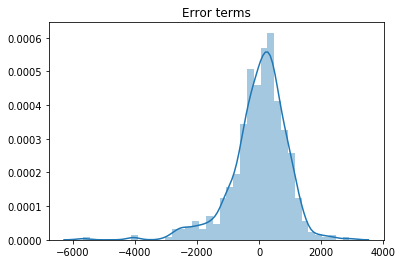

In [600]:
# distrubition plot for residue
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

    The distribution plot of error term shows the normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

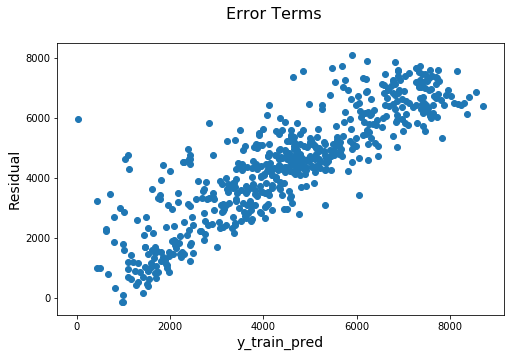

In [601]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,y_train_cnt)
fig.suptitle('Error Terms', fontsize=16)
plt.xlabel('y_train_pred', fontsize=14)                 
plt.ylabel('Residual', fontsize=14) 

### Prediction on test data set

In [482]:
# select final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()


temp  windspeed  season_spring  season_winter  yr_2019  mnth_dec  \
566  0.668758   0.393568              0              0        1         0   
374  0.310971   0.340487              1              0        1         0   
181  0.826591   0.165370              0              0        0         0   
529  0.734175   0.476922              0              0        1         0   
233  0.788172   0.524373              0              0        0         0   

     mnth_jan  mnth_jul  mnth_nov  holiday_Y  weathersit_Normal  
566         0         1         0          0                  0  
374         1         0         0          0                  0  
181         0         1         0          0                  0  
529         0         0         0          0                  0  
233         0         0         0          0                  0

In [483]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

const      temp  windspeed  season_spring  season_winter  yr_2019  \
566    1.0  0.668758   0.393568              0              0        1   
374    1.0  0.310971   0.340487              1              0        1   
181    1.0  0.826591   0.165370              0              0        0   
529    1.0  0.734175   0.476922              0              0        1   
233    1.0  0.788172   0.524373              0              0        0   

     mnth_dec  mnth_jan  mnth_jul  mnth_nov  holiday_Y  weathersit_Normal  
566         0         0         1         0          0                  0  
374         0         1         0         0          0                  0  
181         0         0         1         0          0                  0  
529         0         0         0         0          0                  0  
233         0         0         0         0          0                  0

In [484]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

In [485]:
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.817


In [486]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.802


In [487]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 639858.2944


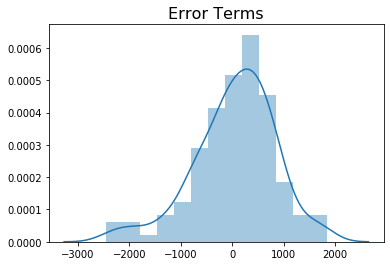

In [488]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

    THE ERRORS ARE DISTRIBUTED NORMALLY  AND HAS A MEAN VALUE OF 0

Text(0, 0.5, 'y_test_pred')

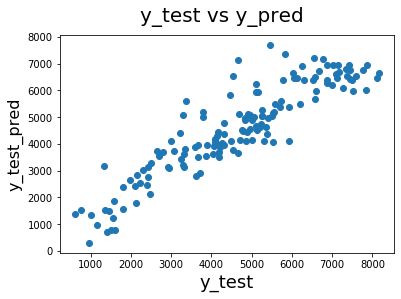

In [490]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 

In [491]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm_final.rsquared,2), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

R- Sqaured train:  0.79   Adj. R-Squared train: 0.781
R- Sqaured test :  0.82   Adj. R-Squared test : 0.802

Coefficent for the variables are:
const                2509.809
temp                 3637.782
windspeed           -1649.514
season_spring        -990.057
season_winter         448.658
yr_2019              2149.518
mnth_dec             -515.655
mnth_jan             -368.597
mnth_jul             -632.876
mnth_nov             -516.158
holiday_Y            -553.518
weathersit_Normal    -507.245
dtype: float64


###  The equation of best fit line 
    cnt=2509.809+(tempX3637.782)-(windspeed X 1649.514)-(season_spring X 990.057)+(season_winter X 448.658)+(yr_2019 x 2149.518)-(mnth_dec x 515.655)-(mnth_jan X 368.597)-(mnth_jul X 632.876)-(mnth_nov X 516.158)-(holiday_Y X 553.518)-(weathersit_Normal X 507.245)


        1.From R-Squared and adj R-Squared value of both train and test dataset we could conclude that the above variables can well explain  80% of about bike demand.
       
        2.Coeffiencients of the variables explains the factors effecting the bike demand
      
        So it recomended to give these variables utmost importance while planning to achieve maximum demand.